## Time series preprocessing

In [1]:
# DAL Library
# version 2.1

source("../examples.R")

#loading DAL
load_dal() # see ../examples.R 

Loading required package: dal


Attaching package: ‘dal’


The following object is masked from ‘package:stats’:

    optimize


The following objects are masked from ‘package:base’:

    jitter, transform




### Cosine series for studying

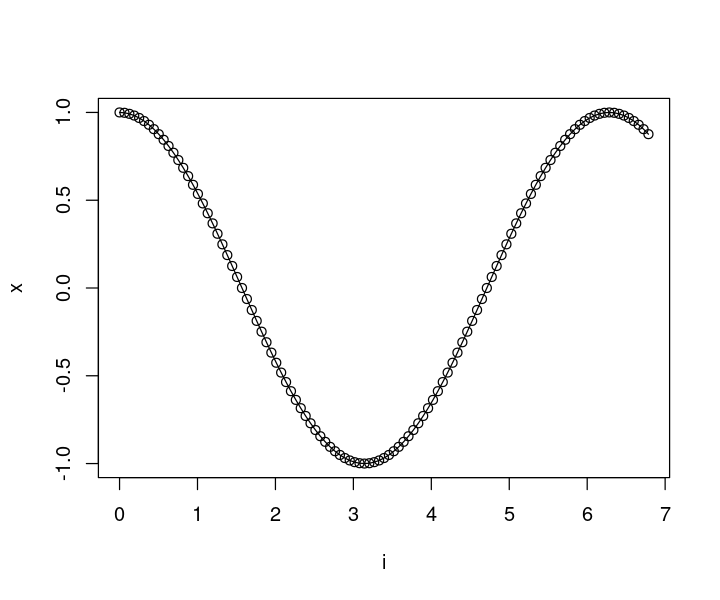

In [2]:
i <- seq(0, 2*pi+8*pi/50, pi/50)
x <- cos(i)

options(repr.plot.width=6, repr.plot.height=5)  
par(mfrow = c(1, 1))
plot(i, x)
lines(i, x)

### sliding windows

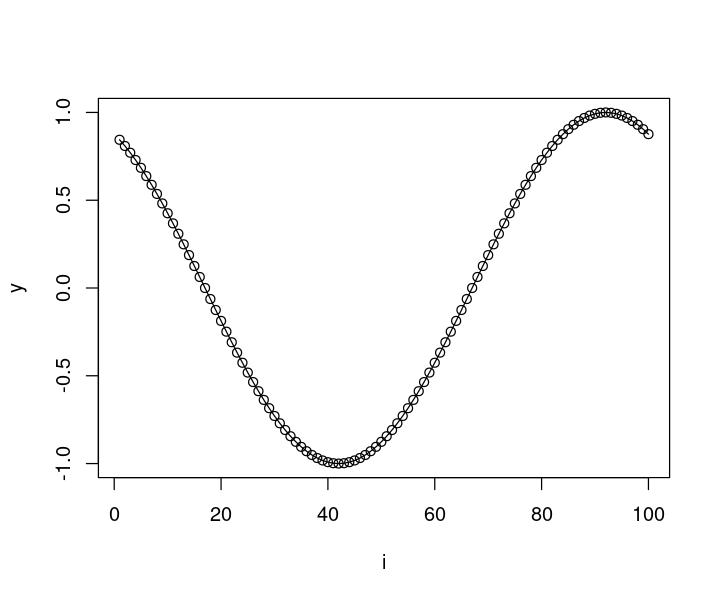

In [3]:
sw_size <- 10
xw <- ts_data(x, sw_size)
i <- 1:nrow(xw)
y <- xw[,sw_size]

plot(i, y)
lines(i, y)

### smooth

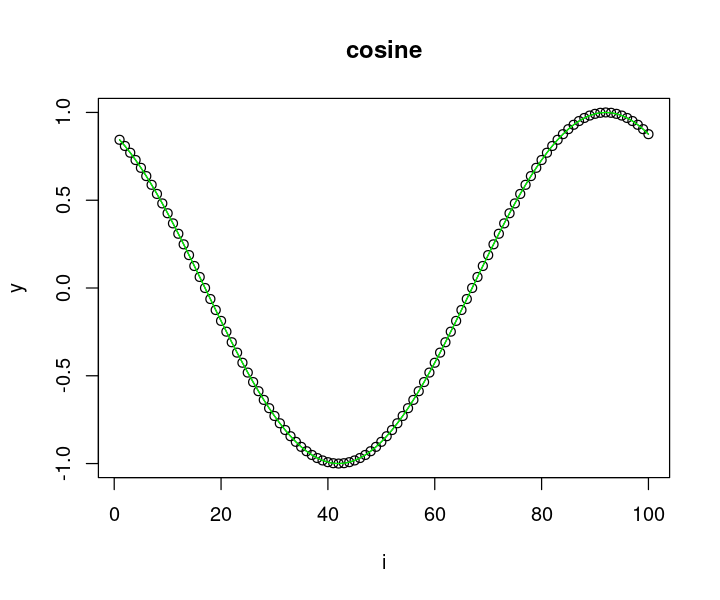

In [4]:
filter <- ts_smooth()
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
lines(x = idx, y = xa[,sw_size], col="green")

### moving average

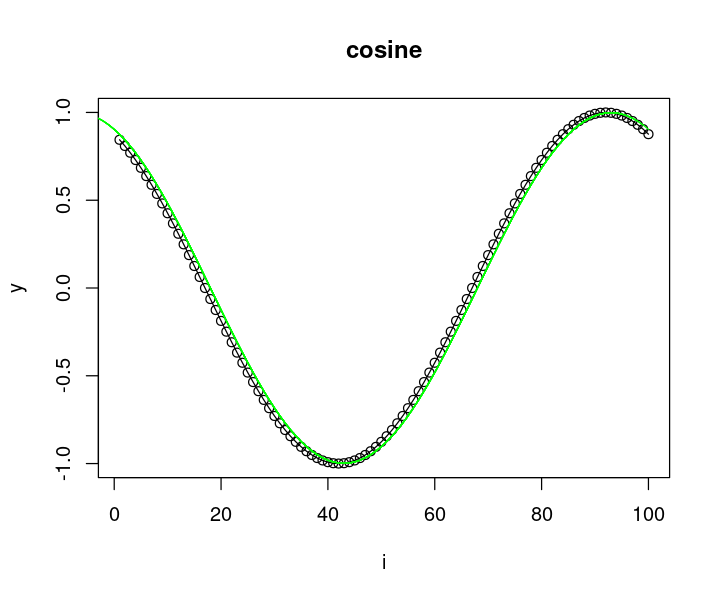

In [5]:
filter <- ts_ma(3)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
  lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}

### exponential moving average

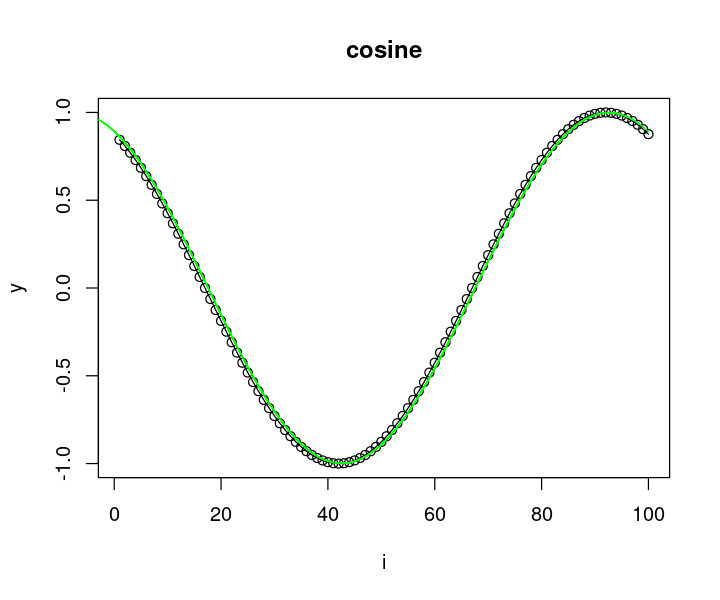

In [6]:
filter <- ts_ema(3)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
  lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}

### awareness

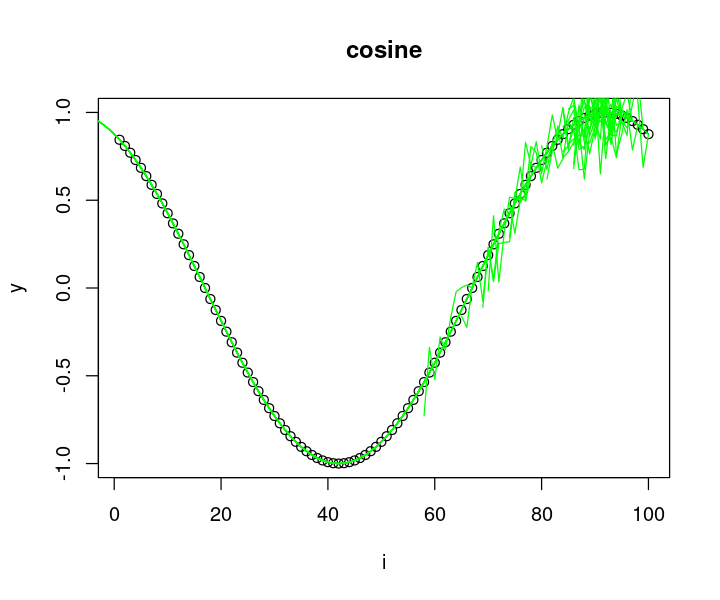

In [7]:
filter <- ts_awareness(0.25)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}

### smooth awareness

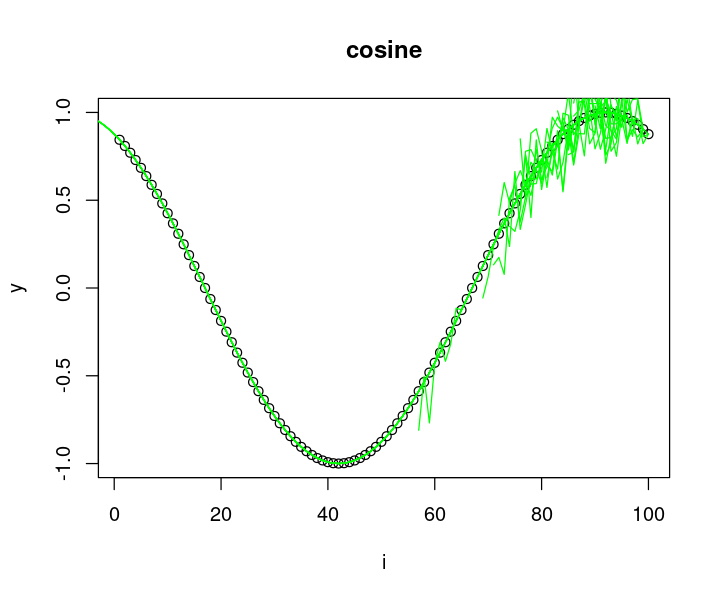

In [8]:
filter <- ts_aware_smooth(0.25)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}